# DSCI 100 Final Group Project

# Title

### Group 37- Jaana Rodrigo, Matthew Kyi, Mersara Shi

## Introduction

**J- provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report**

**Mer- Clerly state the question you tried to answer with your project**

**Mat- identify and fully describe the dataset that was used to answer the question**

Firstly, we will install the libraries necessary for us to load, wrangle and visualize our datasets.

In [1]:
# Run this cell! 
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 7)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Next, we will load the two datasets.

In [2]:
download.file(url = "https://raw.githubusercontent.com/MatthewKyi/DSCI100-004-37/refs/heads/main/players.csv", destfile = "players-local.csv")
players <- read_csv("players-local.csv")
head(players)
download.file(url = "https://raw.githubusercontent.com/MatthewKyi/DSCI100-004-37/refs/heads/main/sessions.csv", destfile = "sessions-local.csv")
sessions <- read_csv("sessions-local.csv")
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


### Players Dataset

Observations: 196 unique players.

Variables: 7

1. experience (chr)- Player's skill level.

2. hashedEmail (chr)- Player's email, hashed for privacy.

3. name (chr)- Player's name.

4. gender (chr)- Player's self- identified gender.

5. played_hours (dbl)- Number of hours played.

6. Age (dbl)- Age of the player.

7. subscribe (lgl)- Newsletter subscription status

Potential issues
- Many of the played_hours values are 0 due to inactive players.
- Extreme values/ outliers

In [3]:
#Minimum, mean, median and maximum values for Age
age_summary <- players |>
  summarise(
    min = round(min(Age, na.rm = TRUE), 2),
    mean = round(mean(Age, na.rm = TRUE), 2),
    median = round(median(Age, na.rm = TRUE), 2),
    max = round(max(Age, na.rm = TRUE), 2)
  ) |>
  pivot_longer(everything(), names_to = "stat", values_to = "Age") |>
  as_tibble()

age_summary

stat,Age
<chr>,<dbl>
min,9.00
mean,21.14
median,19.00
max,58.00


In [4]:
#Minimum, mean, median and maximum values for Hours Played
played_hours_summary <- players |>
  summarise(
    min = round(min(played_hours, na.rm = TRUE), 2),
    mean = round(mean(played_hours, na.rm = TRUE), 2),
    median = round(median(played_hours, na.rm = TRUE), 2),
    max = round(max(played_hours, na.rm = TRUE), 2)
  ) |>
  pivot_longer(everything(), names_to = "stat", values_to = "played_hours") |>
  as_tibble()

played_hours_summary

stat,played_hours
<chr>,<dbl>
min,0.00
mean,5.85
median,0.10
max,223.10


In [5]:
#Count and percentage of each experience level
experience_counts <- players |>
  count(experience) |>
  rename(count = n) |>
  mutate(percentage = round((count / sum(count)) * 100, 2))

experience_counts

experience,count,percentage
<chr>,<int>,<dbl>
Amateur,63,32.14
Beginner,35,17.86
Pro,14,7.14
Regular,36,18.37
Veteran,48,24.49


In [6]:
#Count and percentage of each gender
gender_counts <- players |>
  count(gender) |>
  rename(count = n) |>
  mutate(percentage = round((count / sum(count)) * 100, 2))

gender_counts

gender,count,percentage
<chr>,<int>,<dbl>
Agender,2,1.02
Female,37,18.88
Male,124,63.27
Non-binary,15,7.65
Other,1,0.51
Prefer not to say,11,5.61
Two-Spirited,6,3.06


In [7]:
#Count and percentageof each subscription status
subscribe_counts <- players |>
  count(subscribe) |>
  rename(subscription_status = subscribe, count = n) |>
  mutate(percentage = round((count / sum(count)) * 100, 2))

subscribe_counts

subscription_status,count,percentage
<lgl>,<int>,<dbl>
FALSE,52,26.53
TRUE,144,73.47


### Sessions Dataset
Observations: 1535 sessions recorded.

Variables: 5

1. hashedEmail (chr)- Player's email, hashed for privacy. 
2. start_time (chr)- Date, time the session began.
3. end_time (chr)- Date, time the session ended.
4. original_start_time (dbl)- Start time in Unix timestamp.
5. original_end_time (dbl)- End time in Unix timestamp.

Potential issues
- The format of start_time and end_time are not easy to work with.

In [8]:
#Mutating the dataset to include session duration in minutes
sessions <- sessions |>
  mutate(
    start_time_dt = dmy_hm(start_time),
    end_time_dt = dmy_hm(end_time),
    session_duration = as.numeric(difftime(end_time_dt, start_time_dt, units = "mins"))
  )

sessions

hashedEmail,start_time,end_time,original_start_time,original_end_time,start_time_dt,end_time_dt,session_duration
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dttm>,<dttm>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12,2024-06-30 18:12:00,2024-06-30 18:24:00,12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12,2024-06-17 23:33:00,2024-06-17 23:46:00,13
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12,2024-07-25 17:34:00,2024-07-25 17:57:00,23
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12,2024-07-25 03:22:00,2024-07-25 03:58:00,36
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12,2024-07-28 15:36:00,2024-07-28 15:57:00,21
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12,2024-07-25 06:15:00,2024-07-25 06:22:00,7
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12,2024-05-20 02:26:00,2024-05-20 02:45:00,19


In [9]:
#Minimum, mean, median and maximum values for session duration
session_duration_summary <- sessions |>
  summarise(
    min = round(min(session_duration, na.rm = TRUE), 2),
    mean = round(mean(session_duration, na.rm = TRUE), 2),
    median = round(median(session_duration, na.rm = TRUE), 2),
    max = round(max(session_duration, na.rm = TRUE), 2)
  ) |>
  pivot_longer(everything(), names_to = "stat", values_to = "session_duration") |>
  as_tibble()

session_duration_summary

stat,session_duration
<chr>,<dbl>
min,3.00
mean,50.86
median,30.00
max,259.00


In [10]:
#Session count and mean duration for each player
player_session_summary <- sessions |>
  group_by(hashedEmail) |>
  summarise(
    session_count = n(),
    mean_duration = round(mean(session_duration, na.rm = TRUE), 2)
  ) |>
  rename(player = hashedEmail) |>
  arrange(desc(session_count))

player_session_summary

player,session_count,mean_duration
<chr>,<int>,<dbl>
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310,15.47
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,219,66.99
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,159,62.56
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,147,80.46
⋮,⋮,⋮
fcab03c6d3079521e7f9665caed0f31fe3dae6b5ccb86e6cb58747a43aa8789f,1,80
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1,9
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1,72


### Broad Question
1. What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
### Specific Question
Can age and the number of hours played be used to predict subscription status in the ‘players’ dataset?

Response Variable: subscribe (TRUE/FALSE)
Explanatory Variables: played_hours (dbl), Age (dbl)

## How the data will help address the question:

Each row represents a single player, linking characteristics (played_hours, experience, age, gender) to subscription status. The dataset is tidy, so analysis will handle missing values, and addressing outliers. Classification models will assess whether higher engagement predicts subscription and how this relationship varies across player characteristics.

# Methods and Results

**J-describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
your report should include code which:
Mer-load data
Mat-wrangles and cleans the data to the format necessary for the planned analysis
J-performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
Mer-creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
Mat-performs the data analysis
J-creates a visualization of the analysis 
note: all figures should have a figure number and a legend**

To ensure the data is tidy, I will remove any NA values.

In [11]:
players <- players |>
  drop_na()
players # 2 rows were removed.

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


### Mean Calculation

In [12]:
#Computing the mean value for each quantitative variable in the players.csv data set, and representing them in a tibble. 
mean_tibble <- players |>
  summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE)
  ) |>
  pivot_longer(everything(), names_to = "Variable", values_to = "Mean") |>
  mutate(Mean = round(Mean, 2))

mean_tibble

Variable,Mean
<chr>,<dbl>
mean_played_hours,5.90
mean_age,21.14


### Scatterplot

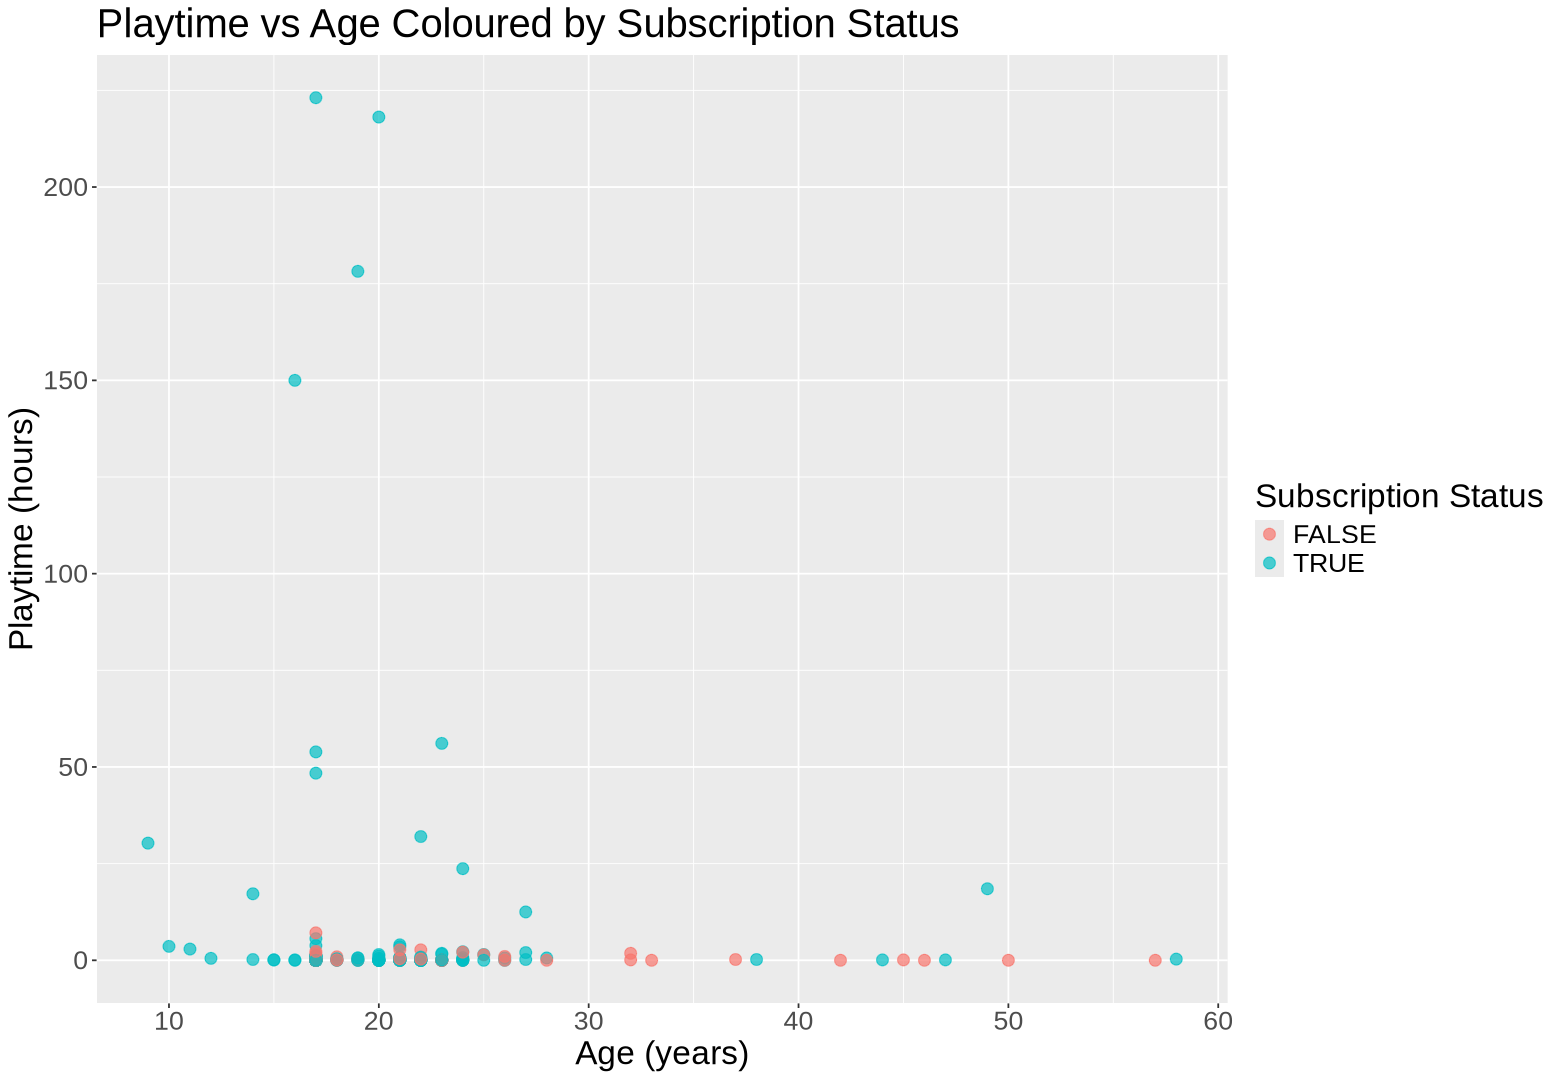

In [15]:
options(repr.plot.width = 13, repr.plot.height = 9)
ggplot(players, aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point(alpha = 0.7, size = 3) +
  labs(
    title = "Playtime vs Age Coloured by Subscription Status",
    x = "Age (years)",
    y = "Playtime (hours)",
    color = "Subscription Status") +
theme(text = element_text(size = 20))

Most non-subscribers have low playtimes- inactive players are less engaged. Few inactive players are subscribed- ongoing interest despite low activity. All players under 17 are subscribed- possible age-related trend.

## Histogram

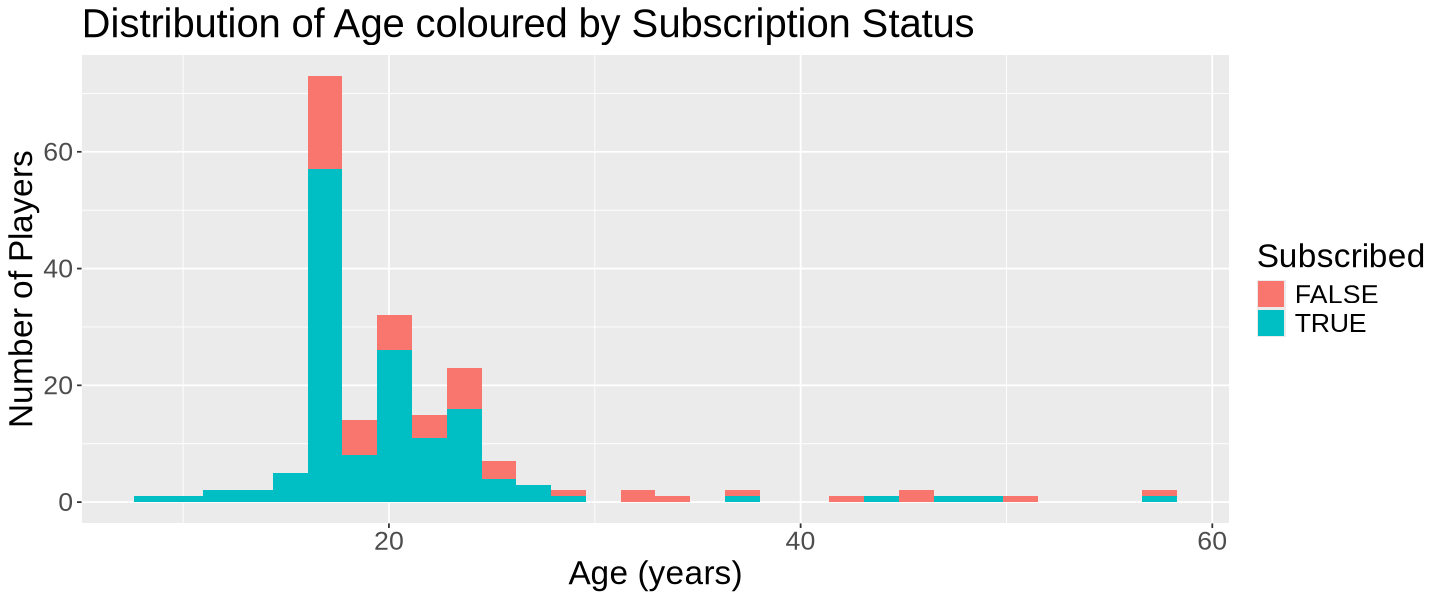

In [16]:
options(repr.plot.width = 12, repr.plot.height = 5)

ggplot(players, aes(x = Age, fill = subscribe)) +
  geom_histogram(bins = 30, position = "stack") +
  labs(
    title = "Distribution of Age coloured by Subscription Status",
    x = "Age (years)",
    y = "Number of Players",
    fill = "Subscribed"
  )  +
theme(text = element_text(size = 20))

Subscription rates are highest among younger players, especially those under 20. Older players show lower subscription rates- age may be a meaningful predictor of newsletter subscription.

### Suitability
KNN classification is appropriate because it handles binary response variables and continuous explanatory variables. 
### Assumptions
- Observations are independent
- Balanced dataset
- Sufficient sample size

### Limitations and Weaknesses
KNN requires continuous variables, we cannot use player experience and gender as exploratory variables. It is also sensitive to outliers and class imbalance. it is also highly dependent on k, which must be carefully selected to avoid overfitting or underfitting.

### Comparison and Model Selection

I would tune k using k-fold cross-validation.

### Data processing
1. Standardization of played_hours and Age
2. Splitting (70 training/ 30 testing)
3. Cross validation

## 5. GitHub Repository

Below is the link to my GitHub repository.

https://github.com/jaanacara/project_planning_individual.git

# Discussion

**Mer - summarize what you found 
Mat - discuss whether this is what you expected to find
J - discuss what impact could such findings have
Mer - discuss what future questions could this lead to**